### Lead Score Assignment

##### Goals of the Case Study

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
#Importing necessary libraries for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing warnings
import warnings
warnings.filterwarnings('ignore')

#To display data in a customized form
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

#### Data understanding and Preparation

In [2]:
# reading the csv file
Lead_Score = pd.read_csv('Leads.csv')
Lead_Score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
Lead_Score.shape

(9240, 37)

There are 9240 rows and 37 columns

In [4]:
Lead_Score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

From above info we can note that there are a lot of columns with null values and columns have both numerical and categorical values

In [5]:
Lead_Score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


From the above information we can note that there are outliers in column "TotalVisits", "Total Time Spent on Website" and "Page Views Per Visit"

#### Data Cleaning and Sanity Check

In [6]:
#Check if there are any duplicate values in the Unique Column "Prospect ID"
sum(Lead_Score.duplicated(subset = 'Prospect ID')) == 0

True

There are no duplicate values in Prospect ID Column

In [7]:
#There are quite a few columns which has Select as it's value. We need to replace those with null values
Lead_Score = Lead_Score.replace('Select', np.nan)

In [8]:
#Checking null values in each of the column
Lead_Score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
#Finding percentage of null values
round((Lead_Score.isnull().sum()*100)/len(Lead_Score),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
#Dropping columns having more than 40% of null values as imputing those columns might lead to biased results
Lead_Score = Lead_Score.drop(Lead_Score.loc[:,list(round(100*(Lead_Score.isnull().sum()/len(Lead_Score.index)), 2)>40)].columns, 1)

In [11]:
Lead_Score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [12]:
Lead_Score.shape

(9240, 30)

Now there are 30 columns

In [13]:
#Now analysing the remaining null values columns and addressing it
round((Lead_Score.isnull().sum()*100)/len(Lead_Score),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [14]:
#Handling missing values in Country column
Lead_Score.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [15]:
#Imputing with the mode value which is India
Lead_Score['Country'] = Lead_Score['Country'].replace(np.nan, 'India')

In [16]:
round((Lead_Score.isnull().sum()*100)/len(Lead_Score),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [17]:
#Handling missing values in Specialization column
Lead_Score.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

Since the missing value count is high imputing it with mode values might not lead an efficient result. Hence creating a new variable called anonymous

In [18]:
Lead_Score['Specialization'] = Lead_Score['Specialization'].replace(np.nan, 'Anonymous')

In [19]:
round((Lead_Score.isnull().sum()*100)/len(Lead_Score),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [20]:
#Handling missing values in "What is your current occupation" column
Lead_Score["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In this case as well will be creating a new variable called "Anonymous" as the percentage of the missing value is high

In [21]:
Lead_Score['What is your current occupation'] = Lead_Score['What is your current occupation'].replace(np.nan, 'Anonymous')

In [22]:
round((Lead_Score.isnull().sum()*100)/len(Lead_Score),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [23]:
#Handling missing values in "What matters most to you in choosing a course" column
Lead_Score["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Imputing the missing values with mode/ most frequently ocurring value 

In [24]:
Lead_Score['What matters most to you in choosing a course'] = Lead_Score['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [25]:
round((Lead_Score.isnull().sum()*100)/len(Lead_Score),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [26]:
#Handling missing values in "Tags" column
Lead_Score["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In this case as well will be creating a new variable called "Anonymous" as the percentage of the missing value is high

In [27]:
Lead_Score['Tags'] = Lead_Score['Tags'].replace(np.nan, 'Anonymous')

In [28]:
round((Lead_Score.isnull().sum()*100)/len(Lead_Score),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [29]:
#Handling missing values in "City" column
Lead_Score["City"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [30]:
Lead_Score['City'] = Lead_Score['City'].replace(np.nan, 'Mumbai')

In [31]:
round((Lead_Score.isnull().sum()*100)/len(Lead_Score),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

Dropping the missing values having null values less than 2%

In [32]:
Lead_Score.dropna(inplace = True)

In [33]:
round((Lead_Score.isnull().sum()*100)/len(Lead_Score),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

Now all the missing values have been handled

In [34]:
Lead_Score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Anonymous,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Anonymous,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Anonymous,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


### Exploratory Data Analysis

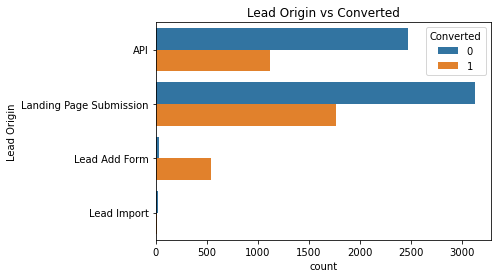

In [35]:
#We'll plot each column against the conversion column and see which column has it's impact more
sns.countplot(y="Lead Origin", hue="Converted", data=Lead_Score)
plt.title("Lead Origin vs Converted")
plt.show()

From the above graph, we can note that Maximum coversion is from Landing Page Submission and API

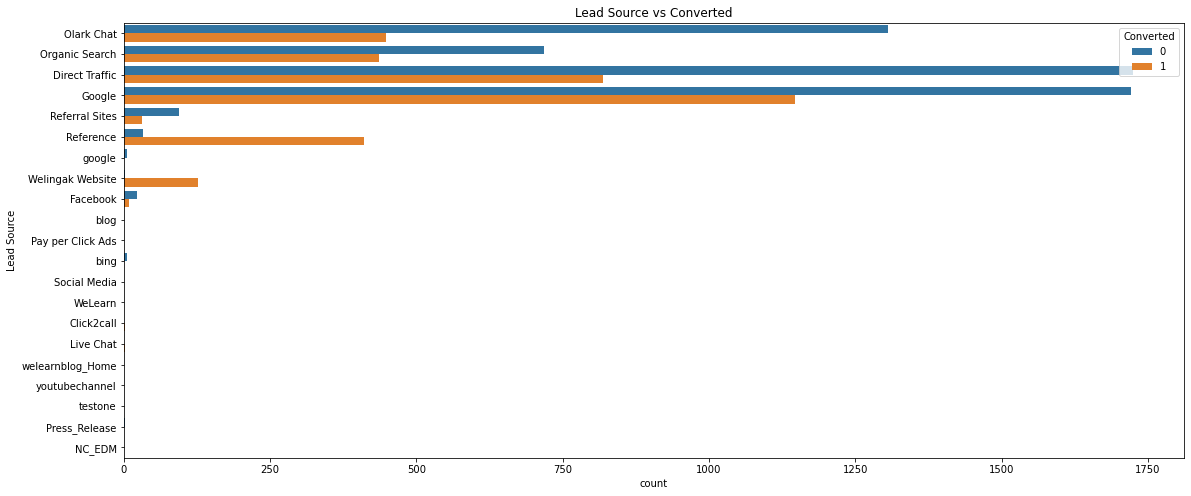

In [36]:
fig, axs = plt.subplots(figsize = (19,8))
sns.countplot(y="Lead Source", hue="Converted", data=Lead_Score)
plt.title("Lead Source vs Converted")
plt.show()

From the above plot we can note that maximum conversion is from Google followed by Direct Traffic

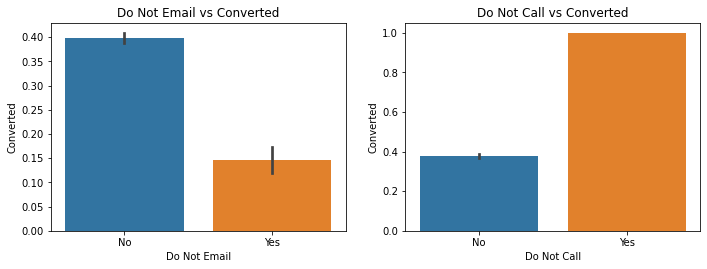

In [37]:
plt.figure(figsize=(18, 13))

plt.subplot(3,3,1)
plt.title("Do Not Email vs Converted")
sns.barplot(x = 'Do Not Email', y = 'Converted', data = Lead_Score)

plt.subplot(3,3,2)
plt.title("Do Not Call vs Converted")
sns.barplot(x = 'Do Not Call', y = 'Converted',data = Lead_Score)

plt.show()

From the above plots we can note that the coversion rate of Do Not call is higher when compared to Do Not Email

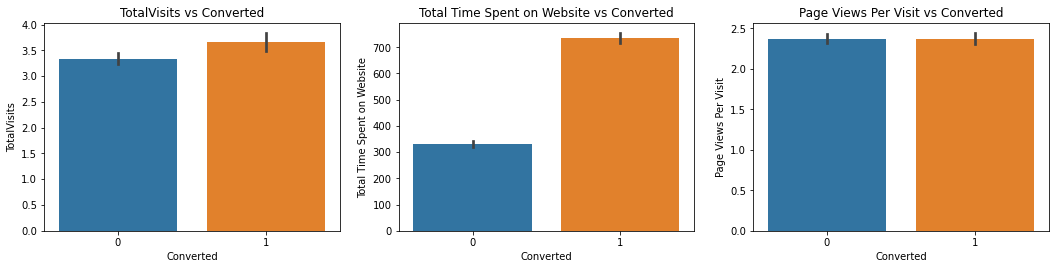

In [38]:
plt.figure(figsize=(18, 13))

plt.subplot(3,3,1)
plt.title("TotalVisits vs Converted")
sns.barplot(x = 'Converted', y = 'TotalVisits', data = Lead_Score)

plt.subplot(3,3,2)
plt.title("Total Time Spent on Website vs Converted")
sns.barplot(x = 'Converted', y = 'Total Time Spent on Website',data = Lead_Score)

plt.subplot(3,3,3)
plt.title("Page Views Per Visit vs Converted")
sns.barplot(x = 'Converted', y = 'Page Views Per Visit',data = Lead_Score)

plt.show()

From the above plots we can note that the coversion rate of all the three are almost the same but the the lead is cold in terms of Total Time Spent on Website

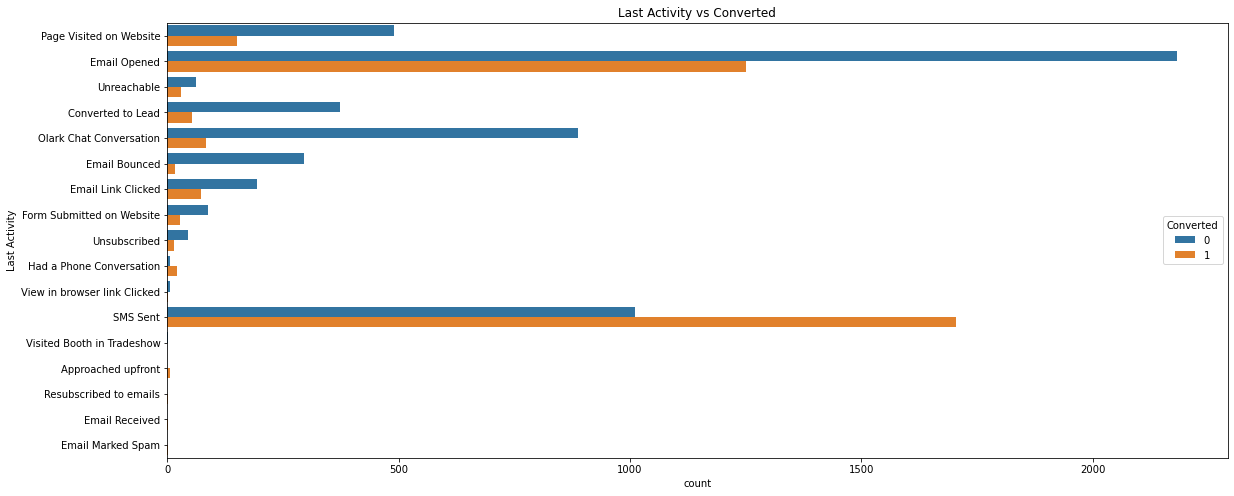

In [39]:
fig, axs = plt.subplots(figsize = (19,8))
sns.countplot(y="Last Activity", hue="Converted", data=Lead_Score)
plt.title("Last Activity vs Converted")
plt.show()

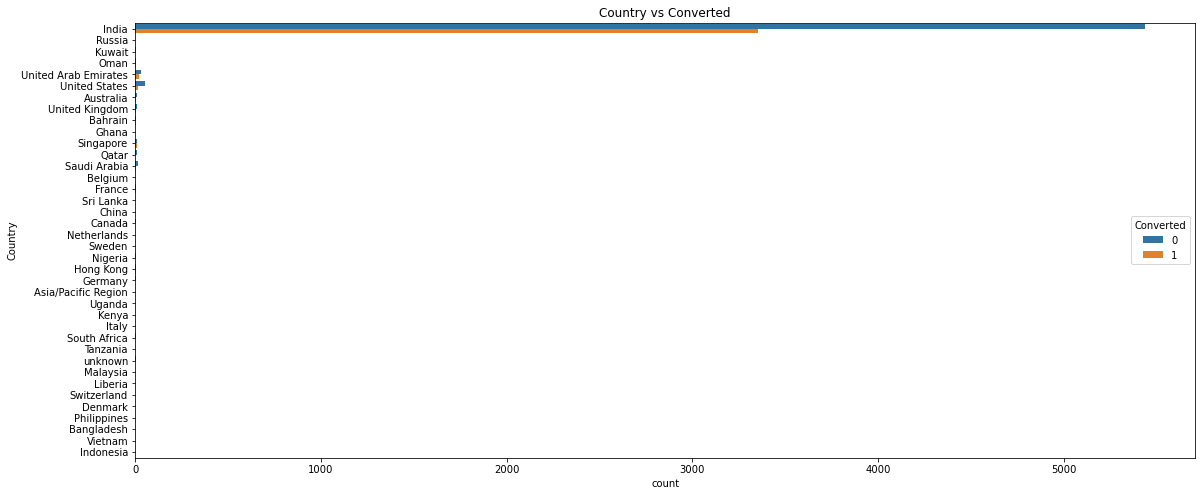

In [40]:
fig, axs = plt.subplots(figsize = (19,8))
sns.countplot(y="Country", hue="Converted", data=Lead_Score)
plt.title("Country vs Converted")
plt.show()

Since most values are India no impacting inferences can be drawn

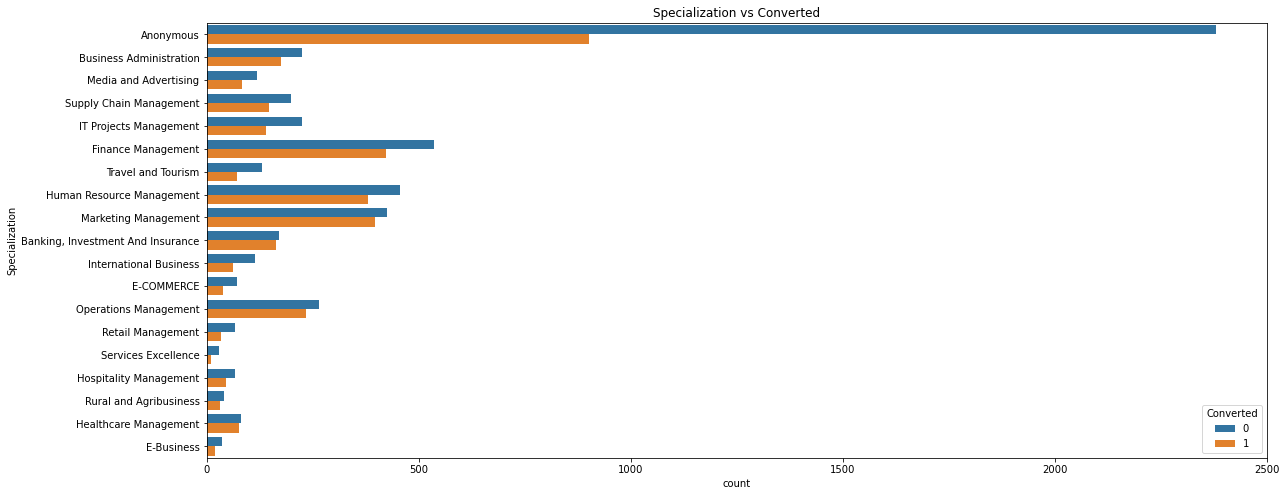

In [41]:
fig, axs = plt.subplots(figsize = (19,8))
sns.countplot(y="Specialization", hue="Converted", data=Lead_Score)
plt.title("Specialization vs Converted")
plt.show()

We can note that there are more conversion happening from the anonymous type

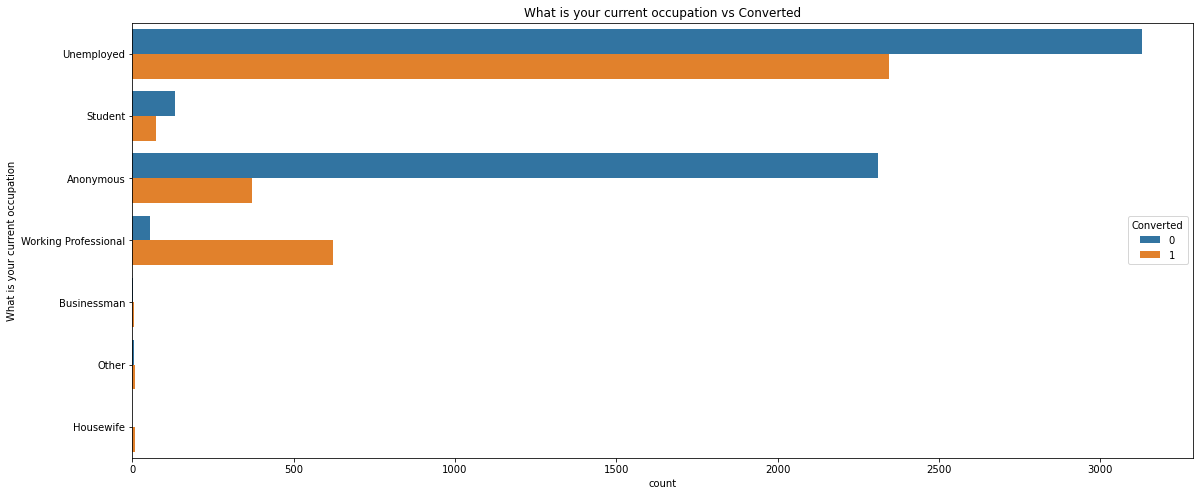

In [42]:
fig, axs = plt.subplots(figsize = (19,8))
sns.countplot(y="What is your current occupation", hue="Converted", data=Lead_Score)
plt.title("What is your current occupation vs Converted")
plt.show()

Since the non-conversion rate is less in the case of Working Professionals the X Education should focus on them to increase there Conversion rate

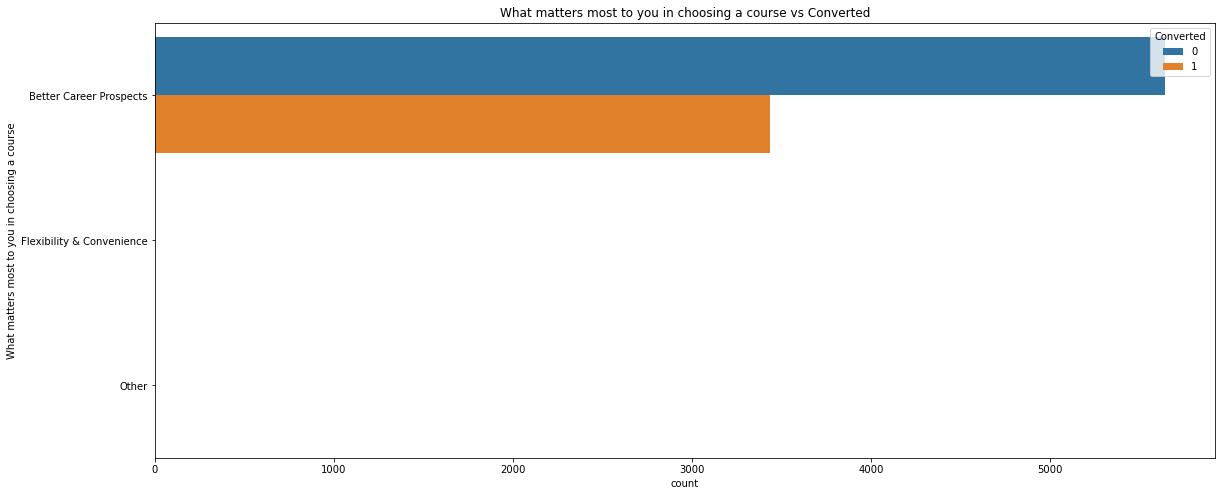

In [43]:
fig, axs = plt.subplots(figsize = (19,8))
sns.countplot(y="What matters most to you in choosing a course", hue="Converted", data=Lead_Score)
plt.title("What matters most to you in choosing a course vs Converted")
plt.show()

We can note that there is such one value Better Career Prospects in the above column so it is not giving such any interesting inferences so we can drop this column

In [44]:
Lead_Score.drop('What matters most to you in choosing a course', inplace=True, axis=1)

In [45]:
Lead_Score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Anonymous,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Anonymous,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Anonymous,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [46]:
Lead_Score.shape

(9074, 29)

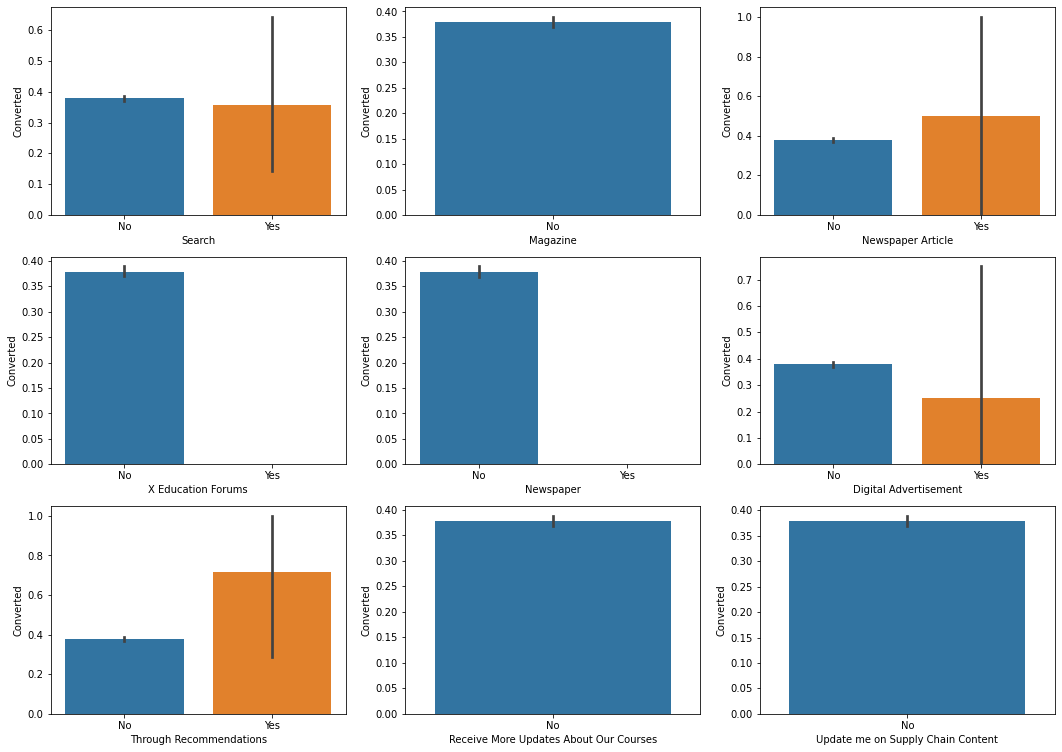

In [47]:
plt.figure(figsize=(18, 13))

plt.subplot(3,3,1)
sns.barplot(x = 'Search', y = 'Converted', data = Lead_Score)

plt.subplot(3,3,2)
sns.barplot(x = 'Magazine', y = 'Converted',data = Lead_Score)

plt.subplot(3,3,3)
sns.barplot(x = 'Newspaper Article', y = 'Converted',data = Lead_Score)

plt.subplot(3,3,4)
sns.barplot(x = 'X Education Forums', y = 'Converted',data = Lead_Score)

plt.subplot(3,3,5)
sns.barplot(x = 'Newspaper', y = 'Converted',data = Lead_Score)

plt.subplot(3,3,6)
sns.barplot(x = 'Digital Advertisement', y = 'Converted',data = Lead_Score)

plt.subplot(3,3,7)
sns.barplot(x = 'Through Recommendations', y = 'Converted',data = Lead_Score)

plt.subplot(3,3,8)
sns.barplot(x = 'Receive More Updates About Our Courses', y = 'Converted',data = Lead_Score)

plt.subplot(3,3,9)
sns.barplot(x = 'Update me on Supply Chain Content', y = 'Converted',data = Lead_Score)

plt.show()

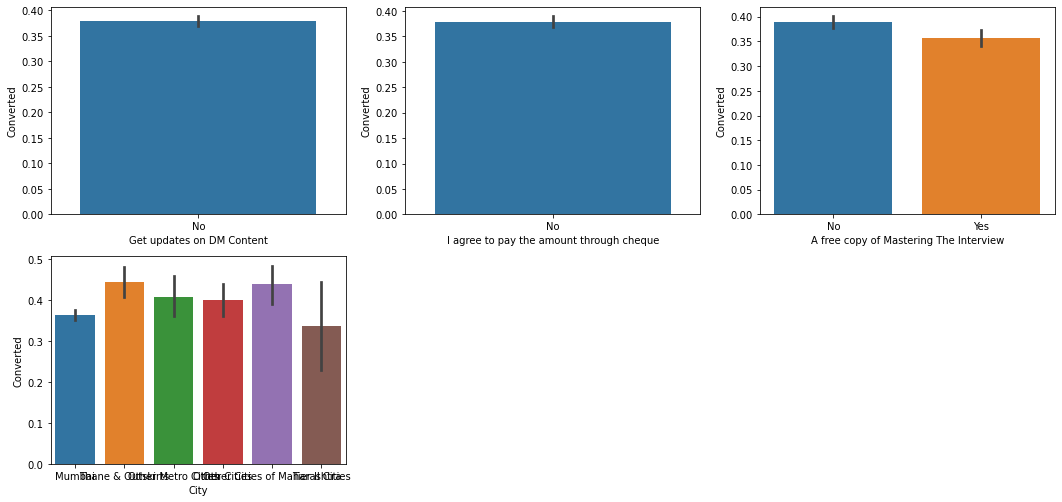

In [48]:
plt.figure(figsize=(18, 13))
plt.subplot(3,3,1)
sns.barplot(x = 'Get updates on DM Content', y = 'Converted',data = Lead_Score)

plt.subplot(3,3,2)
sns.barplot(x = 'I agree to pay the amount through cheque', y = 'Converted',data = Lead_Score)

plt.subplot(3,3,3)
sns.barplot(x = 'A free copy of Mastering The Interview', y = 'Converted',data = Lead_Score)

plt.subplot(3,3,4)
sns.barplot(x = 'City', y = 'Converted',data = Lead_Score)

plt.show()

From the above plots, we can note that there are only more "no" values and some columns are not adding values like Magazine,Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content,X Education Forums,Newspaper,Country,Lead Number,City and I agree to pay the amount through cheque. Hence we can drop these columns as it would provide us the biased insights

In [49]:
Lead_Score.drop(["Magazine","Receive More Updates About Our Courses","Update me on Supply Chain Content","X Education Forums","Newspaper","Country","Lead Number","Get updates on DM Content","I agree to pay the amount through cheque","City"], inplace=True, axis=1)

In [50]:
Lead_Score.shape

(9074, 19)

Now there are in total 20 Columns

In [51]:
Lead_Score.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Anonymous,Unemployed,No,No,No,No,Interested in other courses,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Anonymous,Unemployed,No,No,No,No,Ringing,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,Ringing,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Anonymous,Unemployed,No,No,No,No,Will revert after reading the email,No,Modified


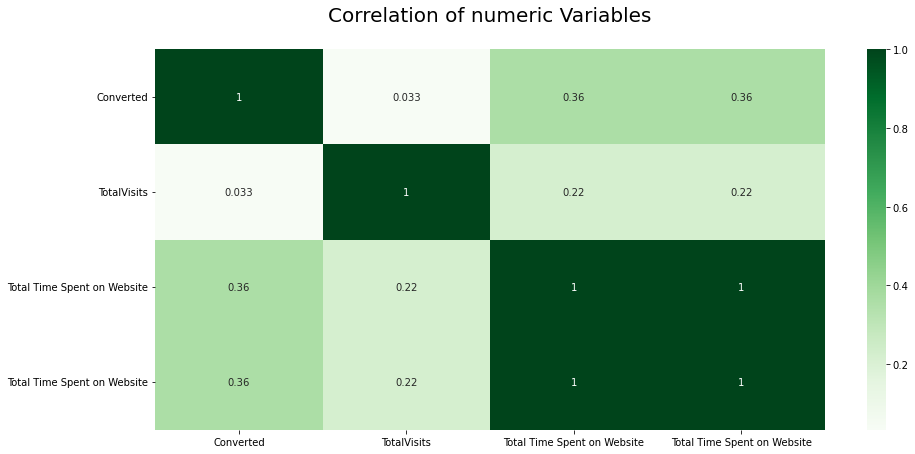

In [52]:
#Plotting heatmap to understand the correlation better
plt.figure(figsize=(15,7))
plt.title("Correlation of numeric Variables\n",fontsize=20)
Numerical_variable=['Converted', 'TotalVisits','Total Time Spent on Website', 'Total Time Spent on Website']
sns.heatmap(data=Lead_Score[Numerical_variable].corr(), cmap="Greens", annot = True)
plt.show()

Converting Categorical Columns yes and No to 0's and 1's

In [53]:
#Storing all yes and no columns in a variable
Yes_and_No_Columns=['Do Not Email','Do Not Call','Search','Newspaper Article','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

In [54]:
#Creating a function
def Convert_yes_and_no(x):
    return x.map({'Yes': 1, "No": 0})

Lead_Score[Yes_and_No_Columns] = Lead_Score[Yes_and_No_Columns].apply(Convert_yes_and_no)

In [55]:
#Checking if all the values are converting into 1's and 0's
Lead_Score.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Anonymous,Unemployed,0,0,0,0,Interested in other courses,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Anonymous,Unemployed,0,0,0,0,Ringing,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,Will revert after reading the email,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,Ringing,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Anonymous,Unemployed,0,0,0,0,Will revert after reading the email,0,Modified


In [56]:
Lead_Score.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.078907,0.000220,0.378554,3.456028,482.887481,2.370151,0.001543,0.000220,0.000441,0.000771,0.318272
std,0.269608,0.014845,0.485053,4.858802,545.256560,2.160871,0.039251,0.014845,0.020992,0.027766,0.465831
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,922.750000,3.200000,0.000000,0.000000,0.000000,0.000000,1.000000
90%,0.000000,0.000000,1.000000,7.000000,1373.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000
95%,1.000000,0.000000,1.000000,10.000000,1557.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000
99%,1.000000,0.000000,1.000000,17.000000,1839.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000


From the above Data we can note that TotalVisits and Page Views Per Visit has Outliers which we can handle by binning method

In [57]:
#Creating bins for TotalVisits Column
Tot_Vis_labels = ['TotalVisit0', 'TotalVisit1and2','TotalVisit3and4','TotalVisit5and6','TotalVisit7and8','TotalVisit9and10',
       'TotalVisit11and12','TotalVisit13and14','TotalVisit15and16','TotalVisits_above_16']

Lead_Score['TotalVisits'] = pd.cut(Lead_Score['TotalVisits'],labels = Tot_Vis_labels, bins=[-1,0.0,2,4,6,8,10,12,14,16,251])

In [58]:
Lead_Score['TotalVisits'].value_counts()

TotalVisit3and4         2426
TotalVisit0             2161
TotalVisit1and2         2074
TotalVisit5and6         1249
TotalVisit7and8          533
TotalVisit9and10         278
TotalVisit11and12        131
TotalVisits_above_16      99
TotalVisit13and14         84
TotalVisit15and16         39
Name: TotalVisits, dtype: int64

In [59]:
#Creating bins for Page Views Per Visit Column
Page_Views_labels=['PVPV_0','PVPV_1and2','PVPV_3and4','PVPV_5and6','PVPV_7and8','PVPV_9and10','PVPV_above_10']

Lead_Score['Page Views Per Visit'] = pd.cut(Lead_Score['Page Views Per Visit'], labels = Page_Views_labels,bins=[-1,0,2,4,6,8,10,60] )

In [60]:
Lead_Score['Page Views Per Visit'].value_counts()

PVPV_1and2       3006
PVPV_3and4       2696
PVPV_0           2161
PVPV_5and6        851
PVPV_7and8        237
PVPV_9and10        73
PVPV_above_10      50
Name: Page Views Per Visit, dtype: int64

In [61]:
Lead_Score.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,TotalVisit0,0,PVPV_0,Page Visited on Website,Anonymous,Unemployed,0,0,0,0,Interested in other courses,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,TotalVisit5and6,674,PVPV_3and4,Email Opened,Anonymous,Unemployed,0,0,0,0,Ringing,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,TotalVisit1and2,1532,PVPV_1and2,Email Opened,Business Administration,Student,0,0,0,0,Will revert after reading the email,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,TotalVisit1and2,305,PVPV_1and2,Unreachable,Media and Advertising,Unemployed,0,0,0,0,Ringing,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,TotalVisit1and2,1428,PVPV_1and2,Converted to Lead,Anonymous,Unemployed,0,0,0,0,Will revert after reading the email,0,Modified


From above we can note that Last Activit, Tags and Last Notable Activity are almost similar to each other so dropping two of one columns to avoid redunduncy

In [62]:
Lead_Score.drop(['Last Notable Activity','Tags'], inplace=True, axis=1)

In [63]:
Lead_Score.shape

(9074, 17)

In [64]:
Lead_Score.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,TotalVisit0,0,PVPV_0,Page Visited on Website,Anonymous,Unemployed,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,TotalVisit5and6,674,PVPV_3and4,Email Opened,Anonymous,Unemployed,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,TotalVisit1and2,1532,PVPV_1and2,Email Opened,Business Administration,Student,0,0,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,TotalVisit1and2,305,PVPV_1and2,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,TotalVisit1and2,1428,PVPV_1and2,Converted to Lead,Anonymous,Unemployed,0,0,0,0,0


### Data Preparation

#### Creating Dummy Variables

In [65]:
Categorical_Variable=['Lead Origin', 'Lead Source','TotalVisits','Page Views Per Visit','Specialization','Last Activity','What is your current occupation']

In [66]:
#Creating dummy variables for the categorical varibale
dummy = pd.get_dummies(Lead_Score[Categorical_Variable], drop_first=True)

In [67]:
# Adding these dummies to our master dataset
Lead_Score = pd.concat([Lead_Score,dummy],axis=1)

In [68]:
#dropping the redundunt columns
Lead_Score = Lead_Score.drop(Categorical_Variable, axis=1)

In [69]:
Lead_Score.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,TotalVisits_TotalVisit1and2,TotalVisits_TotalVisit3and4,TotalVisits_TotalVisit5and6,TotalVisits_TotalVisit7and8,TotalVisits_TotalVisit9and10,TotalVisits_TotalVisit11and12,TotalVisits_TotalVisit13and14,TotalVisits_TotalVisit15and16,TotalVisits_TotalVisits_above_16,Page Views Per Visit_PVPV_1and2,Page Views Per Visit_PVPV_3and4,Page Views Per Visit_PVPV_5and6,Page Views Per Visit_PVPV_7and8,Page Views Per Visit_PVPV_9and10,Page Views Per Visit_PVPV_above_10,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,674,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,1532,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,305,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,1428,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [70]:
Lead_Score.describe()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,TotalVisits_TotalVisit1and2,TotalVisits_TotalVisit3and4,TotalVisits_TotalVisit5and6,TotalVisits_TotalVisit7and8,TotalVisits_TotalVisit9and10,TotalVisits_TotalVisit11and12,TotalVisits_TotalVisit13and14,TotalVisits_TotalVisit15and16,TotalVisits_TotalVisits_above_16,Page Views Per Visit_PVPV_1and2,Page Views Per Visit_PVPV_3and4,Page Views Per Visit_PVPV_5and6,Page Views Per Visit_PVPV_7and8,Page Views Per Visit_PVPV_9and10,Page Views Per Visit_PVPV_above_10,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.00000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.078907,0.000220,0.378554,482.887481,0.001543,0.000220,0.000441,0.000771,0.318272,0.538351,0.064029,0.003306,0.280251,0.003416,0.316068,0.000220,0.000110,0.193189,0.127177,0.000110,0.000220,0.048821,0.013776,0.000220,0.000110,0.014216,0.000661,0.000110,0.000551,0.000110,0.000110,0.000110,0.228565,0.267357,0.

In [71]:
Lead_Score.shape

(9074, 88)

##### Splitting the Data into Training and Testing Sets

In [72]:
from sklearn.model_selection import train_test_split

# We specify 'random_state' so that the train and test data set always have the same rows, respectively
np.random.seed(0)

In [73]:
X = Lead_Score.drop(['Prospect ID','Converted'], axis=1)

In [74]:
y = Lead_Score['Converted']

In [75]:
#Lets choose the ratio as 70:30
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.70, test_size = 0.30, random_state = 200)

In [76]:
X_train.shape

(6351, 86)

In [77]:
X_test.shape

(2723, 86)

In [78]:
y_train.shape

(6351,)

In [79]:
y_test.shape

(2723,)

### Rescaling the Features

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
scaler = MinMaxScaler()

In [82]:
# Apply scaler() to the column Total Time Spent on Website
X_train[['Total Time Spent on Website']]=scaler.fit_transform(X_train[['Total Time Spent on Website']])

In [83]:
X_train.describe()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,TotalVisits_TotalVisit1and2,TotalVisits_TotalVisit3and4,TotalVisits_TotalVisit5and6,TotalVisits_TotalVisit7and8,TotalVisits_TotalVisit9and10,TotalVisits_TotalVisit11and12,TotalVisits_TotalVisit13and14,TotalVisits_TotalVisit15and16,TotalVisits_TotalVisits_above_16,Page Views Per Visit_PVPV_1and2,Page Views Per Visit_PVPV_3and4,Page Views Per Visit_PVPV_5and6,Page Views Per Visit_PVPV_7and8,Page Views Per Visit_PVPV_9and10,Page Views Per Visit_PVPV_above_10,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
count,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.00000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.00000,6351.0,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.0,6351.000000,6351.000000,6351.000000,6351.00000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,0.078255,0.000315,0.212112,0.001417,0.000157,0.000472,0.000787,0.319162,0.537238,0.065344,0.003307,0.281216,0.003307,0.31066,0.000315,0.000157,0.194772,0.127067,0.000157,0.000157,0.050071,0.015588,0.000315,0.000157,0.014014,0.00063,0.0,0.000472,0.000157,0.000157,0.000157,0.227366,0.265313,0.137301,0.059203,0.030231,0.015273,0.009290,0.004251,

In [84]:
X_train.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,TotalVisits_TotalVisit1and2,TotalVisits_TotalVisit3and4,TotalVisits_TotalVisit5and6,TotalVisits_TotalVisit7and8,TotalVisits_TotalVisit9and10,TotalVisits_TotalVisit11and12,TotalVisits_TotalVisit13and14,TotalVisits_TotalVisit15and16,TotalVisits_TotalVisits_above_16,Page Views Per Visit_PVPV_1and2,Page Views Per Visit_PVPV_3and4,Page Views Per Visit_PVPV_5and6,Page Views Per Visit_PVPV_7and8,Page Views Per Visit_PVPV_9and10,Page Views Per Visit_PVPV_above_10,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3768,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4602,0,0,0.452465,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5792,0,0,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
875,0,0,0.033011,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7674,0,0,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [85]:
#To identify the conversion rate
Conversion_Rate = (sum(Lead_Score['Converted'])/len(Lead_Score['Converted'].index))*100
Conversion_Rate

37.85541106458012

From the above we can note that the conversion rate is 37.85 which is approximately equal to 38

### Building a suitable Model

In [86]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [87]:
logreg = LogisticRegression()  

In [88]:
#Cutting down the number of variables to 15 using RFE method
rfe = RFE(logreg,15) 
rfe = rfe.fit(X_train,y_train)  

In [89]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 40),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 60),
 ('Newspaper Article', False, 53),
 ('Digital Advertisement', False, 26),
 ('Through Recommendations', False, 49),
 ('A free copy of Mastering The Interview', False, 70),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 41),
 ('Lead Source_Direct Traffic', False, 43),
 ('Lead Source_Facebook', False, 32),
 ('Lead Source_Google', False, 45),
 ('Lead Source_Live Chat', False, 50),
 ('Lead Source_NC_EDM', False, 13),
 ('Lead Source_Olark Chat', False, 46),
 ('Lead Source_Organic Search', False, 44),
 ('Lead Source_Pay per Click Ads', False, 52),
 ('Lead Source_Press_Release', False, 64),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 35),
 ('Lead Source_Social Media', False, 27),
 ('Lead Source_WeLearn', False, 36),
 ('Lead Source_Welingak Website', True, 1),

In [90]:
X_train_rfe = X_train.columns[rfe.support_]

In [91]:
X_train_rfe

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

Above displayed variables are the columns selected by RFE method

In [92]:
X_train_rfe_vars=X_train[X_train_rfe]

In [93]:
X_train_rfe_vars.shape

(6351, 15)

### Building Logistic Models with variables selected by RFE and by checking the VIF

##### Model 1

In [94]:
# Add a constant
X_train_lm=sm.add_constant(X_train_rfe_vars)

# Create a first fitted model
lr=sm.GLM(y_train,X_train_lm,family=sm.families.Binomial()).fit() 

In [95]:
#Checking the parameters
lr.params

const                                                   -2.966474
Do Not Email                                            -1.766758
Total Time Spent on Website                              3.907225
Lead Origin_Lead Add Form                                2.188277
Lead Source_Reference                                    1.400001
Lead Source_Welingak Website                             2.849231
Last Activity_Converted to Lead                         -1.194721
Last Activity_Had a Phone Conversation                   1.974699
Last Activity_SMS Sent                                   1.319991
Last Activity_Unsubscribed                               1.291723
What is your current occupation_Businessman              2.749591
What is your current occupation_Housewife               22.953662
What is your current occupation_Other                    1.778217
What is your current occupation_Student                  1.350761
What is your current occupation_Unemployed               1.230649
What is yo

In [96]:
# Printing the summary of the model
print(lr.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2678.2
Date:                Thu, 09 Jun 2022   Deviance:                       5356.3
Time:                        08:07:12   Pearson chi2:                 6.26e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

From the above summary we can note that there are some features having high p -values, we will drop those column after checking VIF value

In [97]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_vars.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_vars.values, i) for i in range(X_train_rfe_vars.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,52.01
3,Lead Source_Reference,40.88
4,Lead Source_Welingak Website,12.14
13,What is your current occupation_Unemployed,1.92
1,Total Time Spent on Website,1.80
7,Last Activity_SMS Sent,1.51
14,What is your current occupation_Working Profes...,1.29
0,Do Not Email,1.12
8,Last Activity_Unsubscribed,1.08
5,Last Activity_Converted to Lead,1.05


From the above p-value and VIF we'll first drop the column What is your current occupation_Housewife which has very high p-value

In [99]:
#dropping column What is your current occupation_Housewife as it has pvalue > 0.05
X = X_train_rfe_vars.drop('What is your current occupation_Housewife', axis=1)

##### Model 2

In [100]:
# Add a constant
X_train_lm = sm.add_constant(X)

# Create a second fitted model
lr1 = sm.GLM(y_train,X_train_lm,family=sm.families.Binomial()).fit() 

In [101]:
# Printing the summary of the model
print(lr1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2683.1
Date:                Thu, 09 Jun 2022   Deviance:                       5366.1
Time:                        08:07:13   Pearson chi2:                 6.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [102]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,52.01
3,Lead Source_Reference,40.88
4,Lead Source_Welingak Website,12.14
12,What is your current occupation_Unemployed,1.92
1,Total Time Spent on Website,1.79
7,Last Activity_SMS Sent,1.51
13,What is your current occupation_Working Profes...,1.29
0,Do Not Email,1.12
8,Last Activity_Unsubscribed,1.08
5,Last Activity_Converted to Lead,1.05


From the above p-value and VIF we'll now drop the column Lead Source_Reference which has p-value > 0.05

In [103]:
#dropping column Lead Source_Reference as it has pvalue > 0.05
X = X.drop('Lead Source_Reference', axis=1)

##### Model 3

In [104]:
# Add a constant
X_train_lm = sm.add_constant(X)

# Create a third fitted model
lr2 = sm.GLM(y_train,X_train_lm,family=sm.families.Binomial()).fit() 

In [105]:
# Printing the summary of the model
print(lr2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2684.1
Date:                Thu, 09 Jun 2022   Deviance:                       5368.3
Time:                        08:07:13   Pearson chi2:                 6.26e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [106]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,1.92
1,Total Time Spent on Website,1.79
2,Lead Origin_Lead Add Form,1.51
6,Last Activity_SMS Sent,1.51
3,Lead Source_Welingak Website,1.30
12,What is your current occupation_Working Profes...,1.29
0,Do Not Email,1.12
7,Last Activity_Unsubscribed,1.08
4,Last Activity_Converted to Lead,1.05
10,What is your current occupation_Student,1.02


From the above p-value and VIF we'll now drop the column Lead Source_Welingak Website which has p-value > 0.05

In [107]:
#dropping column Lead Source_Welingak Website as it has pvalue > 0.05
X = X.drop('Lead Source_Welingak Website', axis=1)

##### Model 4

In [108]:
# Add a constant
X_train_lm = sm.add_constant(X)

# Create a fourth fitted model
lr3 = sm.GLM(y_train,X_train_lm,family=sm.families.Binomial()).fit() 

In [109]:
# Printing the summary of the model
print(lr3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2686.8
Date:                Thu, 09 Jun 2022   Deviance:                       5373.7
Time:                        08:07:13   Pearson chi2:                 6.28e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [110]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,1.92
1,Total Time Spent on Website,1.79
5,Last Activity_SMS Sent,1.51
11,What is your current occupation_Working Profes...,1.27
2,Lead Origin_Lead Add Form,1.21
0,Do Not Email,1.12
6,Last Activity_Unsubscribed,1.08
3,Last Activity_Converted to Lead,1.05
9,What is your current occupation_Student,1.02
4,Last Activity_Had a Phone Conversation,1.00


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

### Making Predictions Using the Final Model

In [111]:
# Getting the predicted values on the train set
y_train_pred = lr3.predict(X_train_lm)
y_train_pred[:10]

3768    0.049666
4602    0.534533
5792    0.997137
875     0.166683
7674    0.989386
1973    0.903317
8462    0.244124
8763    0.206371
1288    0.587118
8436    0.049666
dtype: float64

In [112]:
#Creating a new dataframe and storing the predicted values in it
y_train_pred_lr3=pd.DataFrame({'Converted':y_train.values,'Converted_Probability':y_train_pred,'Prospect ID':y_train.index})
y_train_pred_lr3.head()

,Converted,Converted_Probability,Prospect ID
3768,0,0.049666,3768
4602,1,0.534533,4602
5792,1,0.997137,5792
875,0,0.166683,875
7674,1,0.989386,7674


### Plotting the ROC Curve

An ROC curve demonstrates several things:

1. It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
2. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
3. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [113]:
from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

In [114]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = roc_curve( actual, probs,drop_intermediate = False )   
    auc_score = roc_auc_score( actual, probs )    
    plt.figure(figsize=(5,5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

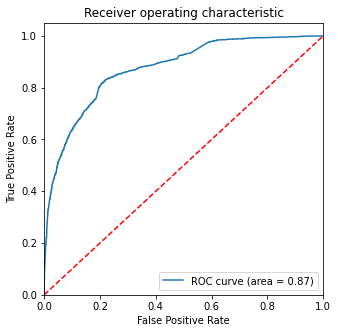

In [115]:
draw_roc(y_train_pred_lr3.Converted, y_train_pred_lr3.Converted_Probability)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [116]:
# Let's create columns with different probability cutoffs 
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_lr3[i]=y_train_pred_lr3['Converted_Probability'].map(lambda x:1 if x > i else 0)  
y_train_pred_lr3.head() 

,Converted,Converted_Probability,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3768,0,0.049666,3768,1,0,0,0,0,0,0,0,0,0
4602,1,0.534533,4602,1,1,1,1,1,1,0,0,0,0
5792,1,0.997137,5792,1,1,1,1,1,1,1,1,1,1
875,0,0.166683,875,1,1,0,0,0,0,0,0,0,0
7674,1,0.989386,7674,1,1,1,1,1,1,1,1,1,1


In [117]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
from sklearn.metrics import confusion_matrix
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
num=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in num:
    cm1=confusion_matrix(y_train_pred_lr3['Converted'],y_train_pred_lr3[i]) 
    total=sum(sum(cm1))                                                         
    Accuracy=(cm1[0,0]+cm1[1,1])/total                                    
    Sensitivity=cm1[1,1]/(cm1[1,0]+cm1[1,1])                       
    Specificity=cm1[0,0]/(cm1[0,0]+cm1[0,1])                        
    cutoff_df.loc[i]=[i, Accuracy, Sensitivity, Specificity]                          
print(cutoff_df) 

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.383089     1.000000     0.000000
0.1          0.1  0.610140     0.984381     0.377744
0.2          0.2  0.728704     0.884505     0.631955
0.3          0.3  0.795623     0.836005     0.770546
0.4          0.4  0.794048     0.754213     0.818785
0.5          0.5  0.800189     0.669544     0.881317
0.6          0.6  0.793261     0.581176     0.924962
0.7          0.7  0.779720     0.502261     0.952016
0.8          0.8  0.759408     0.416358     0.972435
0.9          0.9  0.701937     0.235923     0.991322


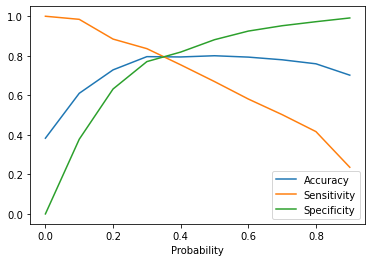

In [118]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [119]:
y_train_pred_lr3['Predicted']=y_train_pred_lr3['Converted_Probability'].map(lambda x:1 if x >0.3 else 0 )  
y_train_pred_lr3.head()

,Converted,Converted_Probability,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
3768,0,0.049666,3768,1,0,0,0,0,0,0,0,0,0,0
4602,1,0.534533,4602,1,1,1,1,1,1,0,0,0,0,1
5792,1,0.997137,5792,1,1,1,1,1,1,1,1,1,1,1
875,0,0.166683,875,1,1,0,0,0,0,0,0,0,0,0
7674,1,0.989386,7674,1,1,1,1,1,1,1,1,1,1,1


In [120]:
from sklearn import metrics

In [121]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_lr3.Converted, y_train_pred_lr3.Predicted)

0.7956227365769171

In [122]:
confusion = metrics.confusion_matrix(y_train_pred_lr3.Converted, y_train_pred_lr3.Predicted)
confusion

array([[3019,  899],
       [ 399, 2034]], dtype=int64)

In [123]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Sensitivity

In [124]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8360049321824907

#### Specificity

In [125]:
# Let us calculate specificity
TN / float(TN+FP)

0.7705461970393057

In [126]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.22945380296069423


In [127]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6934878963518581


In [128]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8832650672908133


#### Precision and Recall

Precision :
TP / TP + FP

In [129]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6934878963518581

Recall : TP / TP + FN

In [130]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8360049321824907

Using sklearn utilities for the same

In [131]:
from sklearn.metrics import precision_score, recall_score

In [132]:
precision_score(y_train_pred_lr3.Converted, y_train_pred_lr3.Predicted)

0.6934878963518581

In [133]:
recall_score(y_train_pred_lr3.Converted, y_train_pred_lr3.Predicted)

0.8360049321824907

### Precision and recall tradeoff

In [134]:
from sklearn.metrics import precision_recall_curve

In [135]:
y_train_pred_lr3.Converted, y_train_pred_lr3.Predicted

(3768    0
 4602    1
 5792    1
 875     0
 7674    1
        ..
 7917    0
 8540    0
 9202    0
 820     0
 1878    1
 Name: Converted, Length: 6351, dtype: int64,
 3768    0
 4602    1
 5792    1
 875     0
 7674    1
        ..
 7917    1
 8540    1
 9202    1
 820     0
 1878    1
 Name: Predicted, Length: 6351, dtype: int64)

In [136]:
p, r, thresholds = precision_recall_curve(y_train_pred_lr3.Converted, y_train_pred_lr3.Predicted)

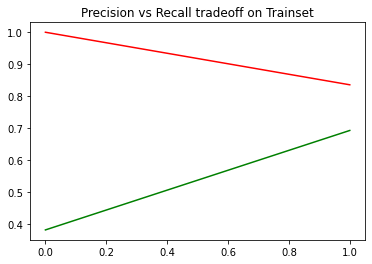

In [137]:
plt.title('Precision vs Recall tradeoff on Trainset')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

Scaling the test data

In [138]:
X_test[['Total Time Spent on Website']]=scaler.transform(X_test[['Total Time Spent on Website']])

In [139]:
X_test_Col = X_train_lm.columns[1:]
X_test_lr3=X_test[X_test_Col]               
X_test_lr3=sm.add_constant(X_test_lr3) 
y_pred_test=lr3.predict(X_test_lr3)  

In [140]:
#Storing the values in y_test_pred_lr3
y_test_pred_lr3=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'Prospect ID':y_test.index})
y_test_pred_lr3.head() 

,Converted,Converted_Probability,Prospect ID
3157,0,0.067283,3157
8157,0,0.049666,8157
3941,0,0.049666,3941
8421,0,0.049666,8421
5690,0,0.160551,5690


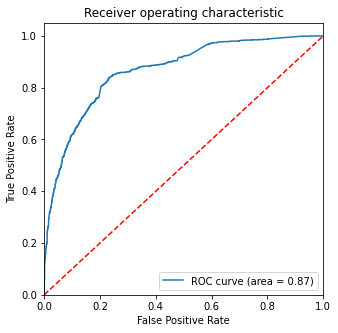

In [141]:
draw_roc(y_test_pred_lr3.Converted, y_test_pred_lr3.Converted_Probability)

In [142]:
#Creating a Predicted Column in order to predict the values for the Optimal Cutoff chosen that is 0.3
y_test_pred_lr3['Predicted']=y_test_pred_lr3['Converted_Probability'].map(lambda x:1 if x >0.3 else 0 )
y_test_pred_lr3.head()

,Converted,Converted_Probability,Prospect ID,Predicted
3157,0,0.067283,3157,0
8157,0,0.049666,8157,0
3941,0,0.049666,3941,0
8421,0,0.049666,8421,0
5690,0,0.160551,5690,0


In [143]:
#Confusion matrix on test data
confusion_test=confusion_matrix(y_test_pred_lr3.Converted,y_test_pred_lr3.Predicted)
confusion_test

array([[1313,  408],
       [ 159,  843]], dtype=int64)

In [144]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_lr3.Converted,y_test_pred_lr3.Predicted)

0.7917737789203085

In [145]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

#### Sensitivity

In [146]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8413173652694611

#### Specificity

In [147]:
# Let us calculate specificity
TN / float(TN+FP)

0.7629285299244625

#### Precision

In [148]:
precision_score(y_test_pred_lr3.Converted, y_test_pred_lr3.Predicted)

0.6738609112709832

#### Recall

In [149]:
recall_score(y_test_pred_lr3.Converted, y_test_pred_lr3.Predicted)

0.8413173652694611

In [150]:
y_test_pred_lr3.Converted, y_test_pred_lr3.Predicted

(3157    0
 8157    0
 3941    0
 8421    0
 5690    0
        ..
 6845    0
 566     0
 8404    1
 3039    0
 9020    1
 Name: Converted, Length: 2723, dtype: int64,
 3157    0
 8157    0
 3941    0
 8421    0
 5690    0
        ..
 6845    0
 566     0
 8404    1
 3039    1
 9020    1
 Name: Predicted, Length: 2723, dtype: int64)

In [151]:
p, r, thresholds = precision_recall_curve(y_test_pred_lr3.Converted, y_test_pred_lr3.Predicted)

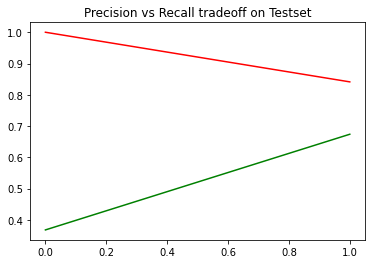

In [152]:
plt.title('Precision vs Recall tradeoff on Testset')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Assigning a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.

In [153]:
#A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted
y_test_pred_lr3['Lead Score']=y_test_pred_lr3['Converted_Probability'].apply(lambda x:round(x*100))
y_test_pred_lr3.head(10)

,Converted,Converted_Probability,Prospect ID,Predicted,Lead Score
3157,0,0.067283,3157,0,7
8157,0,0.049666,8157,0,5
3941,0,0.049666,3941,0,5
8421,0,0.049666,8421,0,5
5690,0,0.160551,5690,0,16
1452,0,0.235640,1452,0,24
5959,0,0.049666,5959,0,5
6580,0,0.155281,6580,0,16
1475,1,0.942672,1475,1,94
8055,1,0.997137,8055,1,100


### Conclusion/Inferences

Our model was able to predict Sensitivity, Specificity, Accuracy, Precision and Recall percentages on a test set which was almost equal to train set

The top four features which contributed towards higher Conversion rate are in their increasing order as below:
- Total Time Spent on Website
- Lead Origin_Lead Add Form
- What is your current occupation_Working Professional
- What is your current occupation_Businessman
- Last Activity_Had a Phone Conversation
    

High rate of recall value when compared to Precision value